In [1]:
import agent as agent_object
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import ipywidgets as widgets

### Environnement

In [2]:
env = gym.make('MountainCar-v0').env

### Agents

In [3]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])
timesteps_per_episode_per_agent = {}

#### Sarsa

In [4]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.000001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 10,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
sarsa_agent = agent_object.SarsaAgent(agent_init)

#### Q-Learning

In [5]:
agent_init = {
    'discount_factor': 0.95, 
    'learning_rate': 0.5, 
    'epsilon': 0.0001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 0,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
q_learning_agent = agent_object.QLearningAgent(agent_init)

#### Expected Sarsa

In [6]:
agent_init = {
    'discount_factor': 1, 
    'learning_rate': 0.5, 
    'epsilon': 0.000001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 5,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
expected_sarsa_agent = agent_object.ExpectedSarsaAgent(agent_init)

### RUN

In [7]:
agents = {
    'sarsa': sarsa_agent,
    'q_learning': q_learning_agent,
    'expected_sarsa': expected_sarsa_agent
}

In [8]:
agent_to_train = widgets.SelectMultiple(
    options=list(agents.keys()),
    value=list(agents.keys()),
    description='AGENTS',
    disabled=False
)
agent_to_train

SelectMultiple(description='AGENTS', index=(0, 1, 2), options=('sarsa', 'q_learning', 'expected_sarsa'), value…

In [9]:
epoch_size = 20
n_episode = 1200
t_max_per_episode = 200
verbose = False
graphical = False
for agent_name in agent_to_train.value:
    timesteps_per_episode_per_agent[agent_name] = list()


In [10]:
assert n_episode % epoch_size == 0, f"epoch_size ({epoch_size}) must be a divisor of n_episode ({n_episode})"

for agent_name, agent in agents.items():
    
    if agent_name not in agent_to_train.value:
        continue
        
    for i_episode in tqdm(range(n_episode)):

        rewards = 0
        state = env.reset()
        next_action = agent.episode_init(state)

        for t in range(t_max_per_episode):
            if graphical:
                env.render()

            state, reward, done, info = env.step(next_action)
            reward = agent.max_position_reward_function(state[0], reward)
            next_action = agent.update(state, reward, done)

            rewards += reward

            if done:
                break
        timesteps_per_episode_per_agent[agent_name].append(t)
    
env.close()

100%|██████████| 1200/1200 [00:24<00:00, 49.56it/s]


### ANALYSIS

In [11]:
rolling_mean_per_agent = {}

for agent_name, timesteps_per_episode in timesteps_per_episode_per_agent.items():
    
    timesteps_per_episode_per_agent[agent_name] = np.array(timesteps_per_episode)
    print(f'best score for {agent_name} agent: {timesteps_per_episode_per_agent[agent_name].min()}')

best score for sarsa agent: 82
best score for q_learning agent: 82
best score for expected_sarsa agent: 84


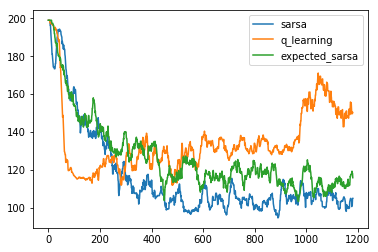

In [12]:
for agent_name, timesteps_per_episode in timesteps_per_episode_per_agent.items():
    
    timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=20)
    plt.plot(range(len(timesteps_per_episode_rolling_mean)), 
             timesteps_per_episode_rolling_mean,
            label=agent_name)

plt.legend()


In [11]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0)

array([125.  , 125.45, 129.5 , 122.2 , 128.7 , 121.  , 125.25, 120.7 ,
       128.6 , 121.25, 125.25, 125.3 , 120.75, 126.25, 120.9 , 123.35,
       122.15, 126.65, 123.05, 126.75, 119.7 , 127.5 , 124.85, 132.3 ,
       122.3 , 127.9 , 128.2 , 116.95, 122.05, 122.2 , 123.55, 118.1 ,
       131.2 , 124.45, 121.35, 125.45, 117.2 , 119.45, 121.05, 132.15,
       125.6 , 128.85, 121.55, 111.6 , 125.8 , 122.9 , 125.45, 121.55,
       122.15, 122.  , 116.25, 113.55, 127.  , 118.4 , 126.  , 127.15,
       124.95, 122.8 , 119.55, 129.6 , 129.05, 120.25, 123.4 , 125.4 ,
       118.95, 125.8 , 128.45, 125.75, 117.55, 115.  , 122.65, 122.2 ,
       122.45, 122.95, 121.95, 118.2 , 118.05, 116.6 , 117.45, 123.45,
       123.55, 125.4 , 121.05, 119.15, 116.65, 122.1 , 126.1 , 111.4 ,
       120.5 , 125.4 , 112.5 , 118.9 , 115.3 , 127.4 , 121.35, 116.85,
       126.6 , 117.65, 119.25, 126.2 ])

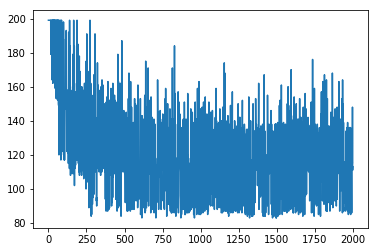

In [12]:
plt.plot(range(n_episode), timesteps_per_episode)

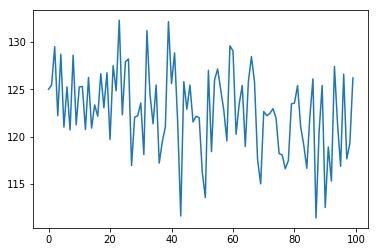

In [13]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

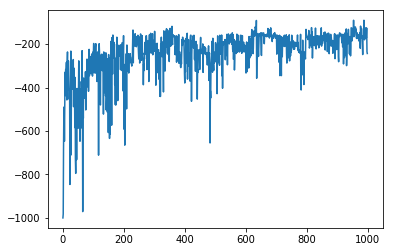

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)

In [140]:
env.close()